In [52]:
import os
import yfinance as yf
import pandas as pd

# Define a list of stock tickers
stock_tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'FB', 'V', 'PYPL', 'NFLX', 'INTC',
                 'CSCO', 'IBM', 'GS', 'JPM', 'BA', 'DIS', 'XOM', 'CVX', 'KO', 'PFE']

# Define the time period for the stock data (e.g., '1d' for 1 day, '1mo' for 1 month)
time_period = '1y'

# Create an empty DataFrame to store the stock data
stock_data = pd.DataFrame()

# Fetch stock data for each ticker
for ticker in stock_tickers:
    stock = yf.download(ticker, period=time_period)

    # Extract relevant columns
    stock = stock[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']]

    # Rename columns to include the ticker symbol
    stock.columns = [f'{ticker}_{col}' for col in stock.columns]

    # Join the stock data with the existing DataFrame
    stock_data = pd.concat([stock_data, stock], axis=1)

# Specify the directory where you want to save the CSV file
#csv_directory = 'C:/Users/Vasilis Tsouvalakis/OneDrive/Desktop/stock_prices'

# Create the directory if it doesn't exist
#os.makedirs(csv_directory, exist_ok=True)

# Specify the path where you want to save the CSV file
#csv_path = os.path.join(csv_directory, 'stock_data.csv')

# Save the DataFrame to a CSV file in the specified path
#stock_data.to_csv(csv_path)

# Display the resulting DataFrame
print(stock_data.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                      AAPL_Open  

In [5]:
stock_data=stock_data.reset_index()

In [62]:
stock_data.dtypes

Date             datetime64[ns]
AAPL_Open               float64
AAPL_High               float64
AAPL_Low                float64
AAPL_Close              float64
                      ...      
PFE_High                float64
PFE_Low                 float64
PFE_Close               float64
PFE_Volume                int64
PFE_Adj Close           float64
Length: 121, dtype: object

In [53]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2023-01-13 00:00:00 to 2024-01-12 00:00:00
Columns: 120 entries, AAPL_Open to PFE_Adj Close
dtypes: float64(101), int64(19)
memory usage: 237.3+ KB


In [55]:
stock_data=stock_data.reset_index()

In [8]:
# Summary statistics for each column
summary_stats = stock_data.describe()

In [9]:
# Display summary statistics
print(summary_stats)

        AAPL_Open   AAPL_High    AAPL_Low  AAPL_Close   AAPL_Volume  \
count  251.000000  251.000000  251.000000  251.000000  2.510000e+02   
mean   174.049682  175.639164  172.796773  174.361674  5.845548e+07   
std     15.796921   15.507280   15.713277   15.519175  1.728812e+07   
min    132.029999  134.919998  131.660004  134.759995  2.404830e+07   
25%    164.815002  166.044998  163.855003  165.220001  4.759765e+07   
50%    176.509995  178.210007  175.190002  176.649994  5.476440e+07   
75%    186.989998  188.250000  185.209999  187.220001  6.501915e+07   
max    198.020004  199.619995  197.000000  198.110001  1.543573e+08   

       AAPL_Adj Close  GOOGL_Open  GOOGL_High   GOOGL_Low  GOOGL_Close  ...  \
count      251.000000  251.000000  251.000000  251.000000   251.000000  ...   
mean       173.958383  120.242112  121.740119  119.110637   120.497450  ...   
std         15.694319   15.739617   15.685169   15.670183    15.626058  ...   
min        134.010941   89.330002   89.88999

In [10]:
# Calculate daily returns for each stock
daily_returns = stock_data.filter(like='Close').pct_change()

# Display daily returns
print(daily_returns.head())

   AAPL_Close  AAPL_Adj Close  GOOGL_Close  GOOGL_Adj Close  MSFT_Close  \
0         NaN             NaN          NaN              NaN         NaN   
1    0.008756        0.008756    -0.009010        -0.009010    0.004682   
2   -0.005370       -0.005370    -0.001862        -0.001862   -0.018889   
3    0.000444        0.000444     0.021181         0.021181   -0.016454   
4    0.019221        0.019221     0.053412         0.053412    0.035744   

   MSFT_Adj Close  AMZN_Close  AMZN_Adj Close  TSLA_Close  TSLA_Adj Close  \
0             NaN         NaN             NaN         NaN             NaN   
1        0.004682   -0.021097       -0.021097    0.074265        0.074265   
2       -0.018889   -0.006143       -0.006143   -0.020610       -0.020610   
3       -0.016454   -0.018647       -0.018647   -0.012502       -0.012502   
4        0.035744    0.038108        0.038108    0.049147        0.049147   

   ...  DIS_Close  DIS_Adj Close  XOM_Close  XOM_Adj Close  CVX_Close  \
0  ...       

In [11]:
# Calculate the correlation matrix of daily returns between stocks
correlation_matrix = daily_returns.corr()

# Display the correlation matrix
print(correlation_matrix)

                 AAPL_Close  AAPL_Adj Close  GOOGL_Close  GOOGL_Adj Close  \
AAPL_Close         1.000000        0.999902     0.526950         0.526950   
AAPL_Adj Close     0.999902        1.000000     0.527002         0.527002   
GOOGL_Close        0.526950        0.527002     1.000000         1.000000   
GOOGL_Adj Close    0.526950        0.527002     1.000000         1.000000   
MSFT_Close         0.565437        0.565325     0.503792         0.503792   
MSFT_Adj Close     0.566278        0.566162     0.504942         0.504942   
AMZN_Close         0.430182        0.429725     0.596582         0.596582   
AMZN_Adj Close     0.430182        0.429725     0.596582         0.596582   
TSLA_Close         0.434829        0.433579     0.329617         0.329617   
TSLA_Adj Close     0.434829        0.433579     0.329617         0.329617   
FB_Close                NaN             NaN          NaN              NaN   
FB_Adj Close            NaN             NaN          NaN              NaN   

In [12]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Columns: 121 entries, Date to PFE_Adj Close
dtypes: datetime64[ns](1), float64(101), int64(19)
memory usage: 237.4 KB


In [13]:
# Calculate the average volume for each stock
average_volume = stock_data.filter(like='Volume').mean()

In [15]:
# 1. Viewing Data
print("First few rows:")
print(df.head())

print("\nLast few rows:")
print(df.tail())

First few rows:
        Date   AAPL_Open   AAPL_High    AAPL_Low  AAPL_Close  AAPL_Volume  \
0 2023-01-13  132.029999  134.919998  131.660004  134.759995     57809700   
1 2023-01-17  134.830002  137.289993  134.130005  135.940002     63646600   
2 2023-01-18  136.820007  138.610001  135.029999  135.210007     69672800   
3 2023-01-19  134.080002  136.250000  133.770004  135.270004     58280400   
4 2023-01-20  135.279999  138.020004  134.220001  137.869995     80223600   

   AAPL_Adj Close  GOOGL_Open  GOOGL_High  GOOGL_Low  ...     KO_Low  \
0      134.010941   90.849998   92.190002  90.129997  ...  60.590000   
1      135.184387   92.059998   92.250000  90.050003  ...  61.560001   
2      134.458435   92.139999   92.800003  90.639999  ...  59.680000   
3      134.518112   90.720001   93.610001  90.629997  ...  59.709999   
4      137.103653   95.099998   98.300003  95.019997  ...  59.400002   

    KO_Close  KO_Volume  KO_Adj Close   PFE_Open   PFE_High    PFE_Low  \
0  61.430000  

In [14]:
df = stock_data

In [28]:
df=df.reset_index()

In [16]:
print("\nDataFrame info:")
print(df.info())


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Columns: 121 entries, Date to PFE_Adj Close
dtypes: datetime64[ns](1), float64(101), int64(19)
memory usage: 237.4 KB
None


In [17]:
# 3. Handling Missing Data
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Date             0
AAPL_Open        0
AAPL_High        0
AAPL_Low         0
AAPL_Close       0
                ..
PFE_High         0
PFE_Low          0
PFE_Close        0
PFE_Volume       0
PFE_Adj Close    0
Length: 121, dtype: int64


In [18]:
# 4. Filtering Data
filtered_df = df[df['AAPL_Close'] > 100]
print("\nFiltered DataFrame:")
print(filtered_df)


Filtered DataFrame:
          Date   AAPL_Open   AAPL_High    AAPL_Low  AAPL_Close  AAPL_Volume  \
0   2023-01-13  132.029999  134.919998  131.660004  134.759995     57809700   
1   2023-01-17  134.830002  137.289993  134.130005  135.940002     63646600   
2   2023-01-18  136.820007  138.610001  135.029999  135.210007     69672800   
3   2023-01-19  134.080002  136.250000  133.770004  135.270004     58280400   
4   2023-01-20  135.279999  138.020004  134.220001  137.869995     80223600   
..         ...         ...         ...         ...         ...          ...   
246 2024-01-08  182.089996  185.600006  181.500000  185.559998     59144500   
247 2024-01-09  183.919998  185.149994  182.729996  185.139999     42841800   
248 2024-01-10  184.350006  186.399994  183.919998  186.190002     46792900   
249 2024-01-11  186.539993  187.050003  183.619995  185.589996     49128400   
250 2024-01-12  186.059998  186.740005  185.190002  185.919998     40444700   

     AAPL_Adj Close  GOOGL_Ope

In [19]:
# 5. Grouping and Aggregation
grouped_mean = df.groupby('Date')['AAPL_Close'].mean()
print("\nMean AAPL_Close for each date:")
print(grouped_mean)


Mean AAPL_Close for each date:
Date
2023-01-13    134.759995
2023-01-17    135.940002
2023-01-18    135.210007
2023-01-19    135.270004
2023-01-20    137.869995
                 ...    
2024-01-08    185.559998
2024-01-09    185.139999
2024-01-10    186.190002
2024-01-11    185.589996
2024-01-12    185.919998
Name: AAPL_Close, Length: 251, dtype: float64


In [20]:
# 6. Rolling Statistics
rolling_mean = df['AAPL_Close'].rolling(window=5).mean()
print("\n5-day rolling mean of AAPL_Close:")
print(rolling_mean)


5-day rolling mean of AAPL_Close:
0             NaN
1             NaN
2             NaN
3             NaN
4      135.810001
          ...    
246    183.707999
247    183.607999
248    183.995999
249    184.731998
250    185.679999
Name: AAPL_Close, Length: 251, dtype: float64


In [21]:
# 7. Correlation
correlation_matrix = df.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)


Correlation matrix:
               AAPL_Open  AAPL_High  AAPL_Low  AAPL_Close  AAPL_Volume  \
AAPL_Open       1.000000   0.997225  0.997564    0.993760    -0.257782   
AAPL_High       0.997225   1.000000  0.997510    0.997283    -0.229493   
AAPL_Low        0.997564   0.997510  1.000000    0.997600    -0.269286   
AAPL_Close      0.993760   0.997283  0.997600    1.000000    -0.251044   
AAPL_Volume    -0.257782  -0.229493 -0.269286   -0.251044     1.000000   
...                  ...        ...       ...         ...          ...   
PFE_High       -0.760133  -0.759591 -0.758806   -0.760497     0.202293   
PFE_Low        -0.755367  -0.754605 -0.753580   -0.755002     0.198224   
PFE_Close      -0.759835  -0.758906 -0.757828   -0.758761     0.205576   
PFE_Volume      0.289903   0.288841  0.290405    0.291983     0.159529   
PFE_Adj Close  -0.748900  -0.747998 -0.747198   -0.748025     0.203712   

               AAPL_Adj Close  GOOGL_Open  GOOGL_High  GOOGL_Low  GOOGL_Close  \
AAPL_Open

<ipython-input-21-4bc838544f7c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: title={'center': 'AAPL Close Price'}>

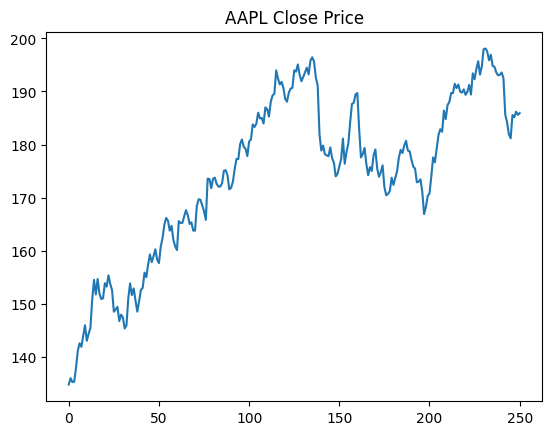

In [57]:
# 8. Plotting apple prices
stock_data['AAPL_Close'].plot(title='AAPL Close Price')

In [24]:
# 9. Time Series Analysis
stock_data['Date'] = pd.to_datetime(df['AAPL_Close'])
df.set_index('Date', inplace=True)
resampled_data = df.resample('M').mean()
print("\nResampled data for monthly mean:")
print(resampled_data)


Resampled data for monthly mean:
             AAPL_Open   AAPL_High    AAPL_Low  AAPL_Close   AAPL_Volume  \
Date                                                                       
1970-01-31  174.049682  175.639164  172.796773  174.361674  5.845548e+07   

            AAPL_Adj Close  GOOGL_Open  GOOGL_High   GOOGL_Low  GOOGL_Close  \
Date                                                                          
1970-01-31      173.958383  120.242112  121.740119  119.110637    120.49745   

            ...     KO_Low   KO_Close     KO_Volume  KO_Adj Close   PFE_Open  \
Date        ...                                                                
1970-01-31  ...  59.431434  59.794263  1.380185e+07     58.794631  36.273147   

            PFE_High    PFE_Low  PFE_Close    PFE_Volume  PFE_Adj Close  
Date                                                                     
1970-01-31  36.59255  35.915458  36.228247  2.881933e+07      35.430917  

[1 rows x 120 columns]


<Axes: title={'center': 'AAPL open Price'}>

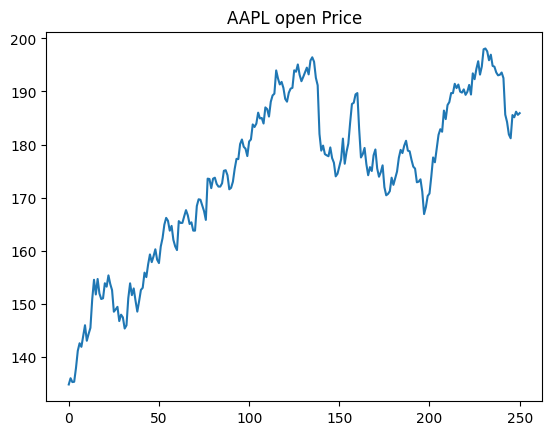

In [50]:
stock_data['AAPL_Close'].plot(title='AAPL open Price')

In [ ]:
df['GOOGL_Close'].plot(title='GOOGL Close Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [49]:
stock_data=stock_data.reset_index()

In [51]:
stock_data

,Date,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Volume,AAPL_Adj Close,GOOGL_Open,GOOGL_High,GOOGL_Low,...,KO_Low,KO_Close,KO_Volume,KO_Adj Close,PFE_Open,PFE_High,PFE_Low,PFE_Close,PFE_Volume,PFE_Adj Close
0,1970-01-01 00:00:00.000000134,132.029999,134.919998,131.660004,134.759995,57809700,134.010941,90.849998,92.190002,90.129997,...,60.590000,61.430000,13986400,59.551201,47.500000,48.160000,47.490002,47.849998,18737500,45.773155
1,1970-01-01 00:00:00.000000135,134.830002,137.289993,134.130005,135.940002,63646600,135.184387,92.059998,92.250000,90.050003,...,61.560001,61.680000,18327800,59.793556,46.540001,46.740002,45.709999,46.080002,29391400,44.079983
2,1970-01-01 00:00:00.000000135,136.820007,138.610001,135.029999,135.210007,69672800,134.458435,92.139999,92.800003,90.639999,...,59.680000,59.810001,19679400,57.980751,45.549999,45.849998,44.970001,45.000000,33835000,43.046860
3,1970-01-01 00:00:00.000000135,134.080002,136.250000,133.770004,135.270004,58280400,134.518112,90.720001,93.610001,90.629997,...,59.709999,59.720001,14894500,57.893501,44.720001,45.270000,44.639999,44.959999,26614900,43.008595
4,1970-01-01 00:00:00.000000137,135.279999,138.020004,134.220001,137.869995,80223600,137.103653,95.099998,98.300003,95.019997,...,59.400002,60.080002,14237700,58.242496,45.279999,45.430000,44.730000,45.110001,25197600,43.152081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,1970-01-01 00:00:00.000000185,182.089996,185.600006,181.500000,185.559998,59144500,185.559998,136.289993,139.009995,136.259995,...,59.419998,60.110001,11554600,60.110001,29.360001,29.680000,29.170000,29.580000,32972100,29.580000
247,1970-01-01 00:00:00.000000185,183.919998,185.149994,182.729996,185.139999,42841800,185.139999,138.500000,141.490005,138.149994,...,59.619999,60.000000,10493700,60.000000,29.600000,29.860001,29.320000,29.400000,39856900,29.400000
248,1970-01-01 00:00:00.000000186,184.350006,186.399994,183.919998,186.190002,46792900,186.190002,141.000000,143.000000,140.910004,...,59.980000,60.200001,12258000,60.200001,29.360001,29.389999,28.879999,28.990000,37413300,28.990000
249,1970-01-01 00:00:00.000000185,186.539993,187.050003,183.619995,185.589996,49128400,185.589996,143.490005,145.220001,140.639999,...,59.689999,59.810001,13754200,59.810001,28.830000,28.920000,28.270000,28.400000,46884700,28.400000


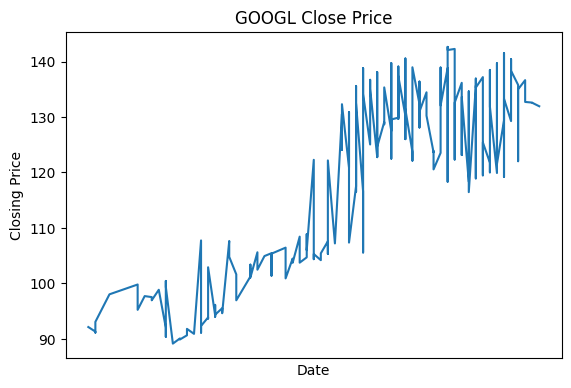

In [45]:
stock_data['GOOGL_Close'].plot(title='GOOGL Close Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

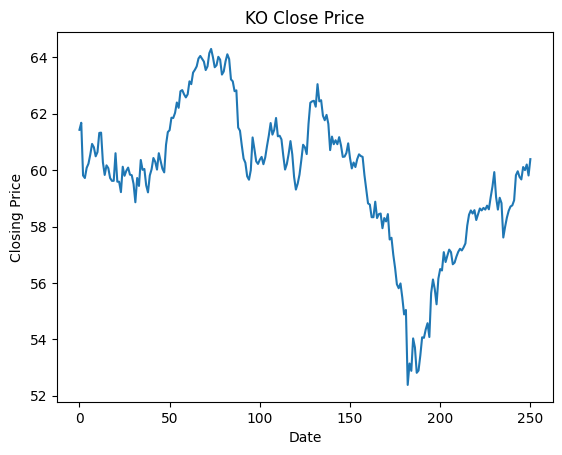

In [40]:
df['KO_Close'].plot(title='KO Close Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [41]:
df

,index,Date,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Volume,AAPL_Adj Close,GOOGL_Open,GOOGL_High,...,KO_Low,KO_Close,KO_Volume,KO_Adj Close,PFE_Open,PFE_High,PFE_Low,PFE_Close,PFE_Volume,PFE_Adj Close
0,0,1970-01-01 00:00:00.000000134,132.029999,134.919998,131.660004,134.759995,57809700,134.010941,90.849998,92.190002,...,60.590000,61.430000,13986400,59.551201,47.500000,48.160000,47.490002,47.849998,18737500,45.773155
1,1,1970-01-01 00:00:00.000000135,134.830002,137.289993,134.130005,135.940002,63646600,135.184387,92.059998,92.250000,...,61.560001,61.680000,18327800,59.793556,46.540001,46.740002,45.709999,46.080002,29391400,44.079983
2,2,1970-01-01 00:00:00.000000135,136.820007,138.610001,135.029999,135.210007,69672800,134.458435,92.139999,92.800003,...,59.680000,59.810001,19679400,57.980751,45.549999,45.849998,44.970001,45.000000,33835000,43.046860
3,3,1970-01-01 00:00:00.000000135,134.080002,136.250000,133.770004,135.270004,58280400,134.518112,90.720001,93.610001,...,59.709999,59.720001,14894500,57.893501,44.720001,45.270000,44.639999,44.959999,26614900,43.008595
4,4,1970-01-01 00:00:00.000000137,135.279999,138.020004,134.220001,137.869995,80223600,137.103653,95.099998,98.300003,...,59.400002,60.080002,14237700,58.242496,45.279999,45.430000,44.730000,45.110001,25197600,43.152081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,246,1970-01-01 00:00:00.000000185,182.089996,185.600006,181.500000,185.559998,59144500,185.559998,136.289993,139.009995,...,59.419998,60.110001,11554600,60.110001,29.360001,29.680000,29.170000,29.580000,32972100,29.580000
247,247,1970-01-01 00:00:00.000000185,183.919998,185.149994,182.729996,185.139999,42841800,185.139999,138.500000,141.490005,...,59.619999,60.000000,10493700,60.000000,29.600000,29.860001,29.320000,29.400000,39856900,29.400000
248,248,1970-01-01 00:00:00.000000186,184.350006,186.399994,183.919998,186.190002,46792900,186.190002,141.000000,143.000000,...,59.980000,60.200001,12258000,60.200001,29.360001,29.389999,28.879999,28.990000,37413300,28.990000
249,249,1970-01-01 00:00:00.000000185,186.539993,187.050003,183.619995,185.589996,49128400,185.589996,143.490005,145.220001,...,59.689999,59.810001,13754200,59.810001,28.830000,28.920000,28.270000,28.400000,46884700,28.400000


# Data visualization

In [74]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['AAPL_Open'],
                high=df['AAPL_High'],
                low=df['AAPL_Low'],
                close=df['AAPL_Close'])])

fig.update_layout(title='AAPL Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.show()

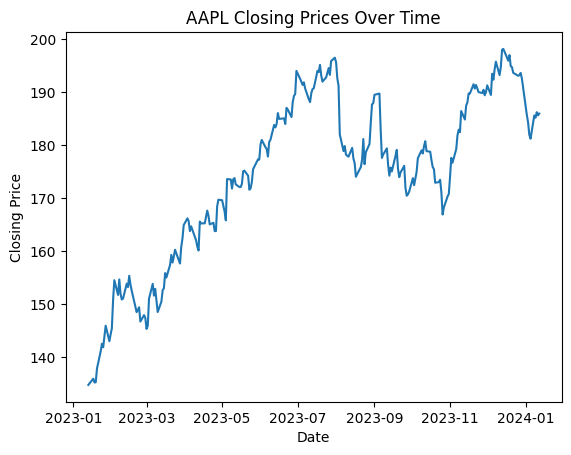

In [73]:
import matplotlib.pyplot as plt

plt.plot(df['Date'], df['AAPL_Close'])
plt.title('AAPL Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

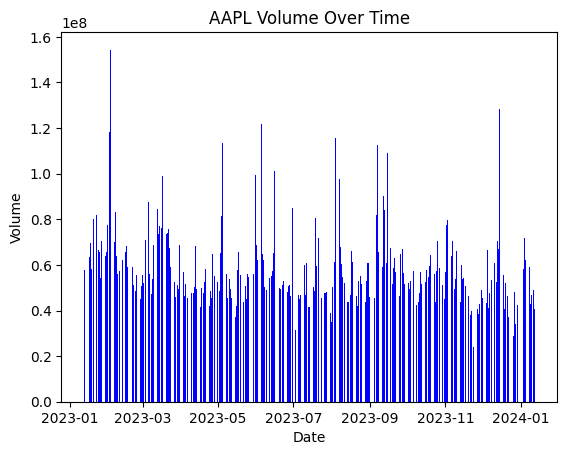

In [72]:
plt.bar(df['Date'], df['AAPL_Volume'], color='blue')
plt.title('AAPL Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

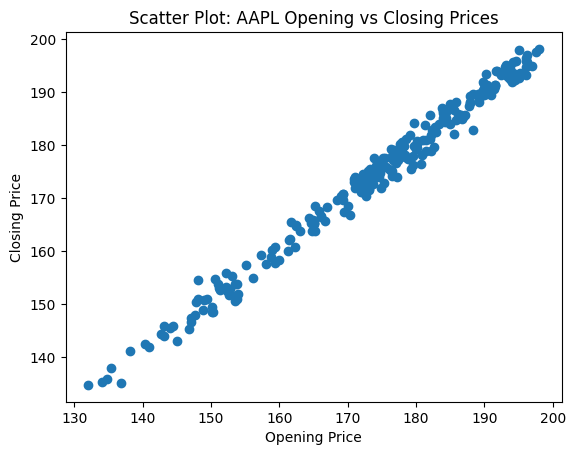

In [71]:
plt.scatter(df['AAPL_Open'], df['AAPL_Close'])
plt.title('Scatter Plot: AAPL Opening vs Closing Prices')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.show()

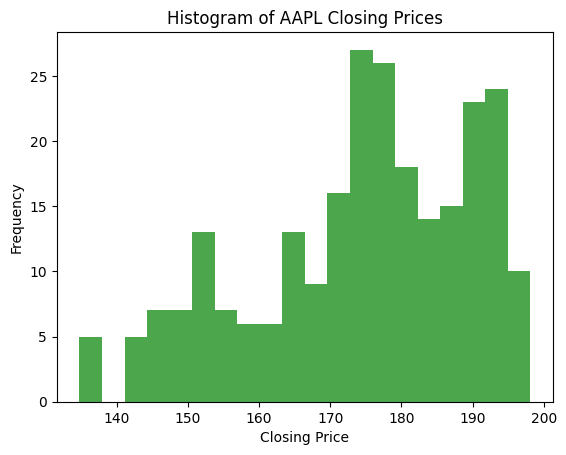

In [33]:
plt.hist(df['AAPL_Close'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of AAPL Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

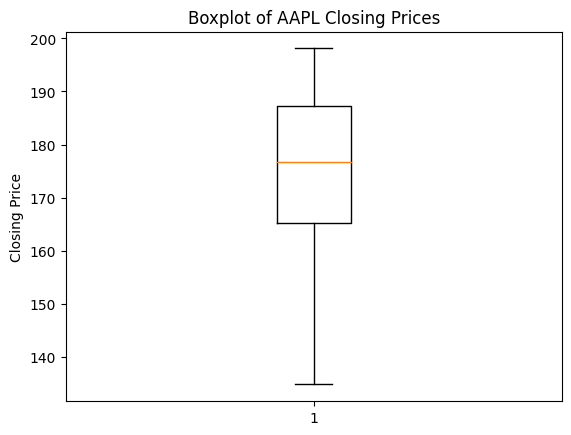

In [34]:
plt.boxplot(df['AAPL_Close'])
plt.title('Boxplot of AAPL Closing Prices')
plt.ylabel('Closing Price')
plt.show()

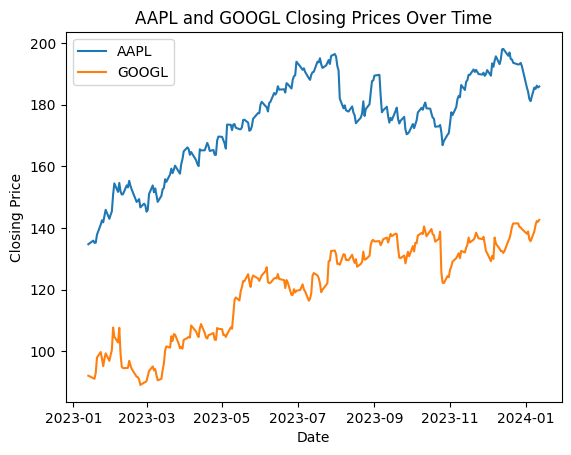

In [70]:
plt.plot(df['Date'], df['AAPL_Close'], label='AAPL')
plt.plot(df['Date'], df['GOOGL_Close'], label='GOOGL')
plt.legend()
plt.title('AAPL and GOOGL Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


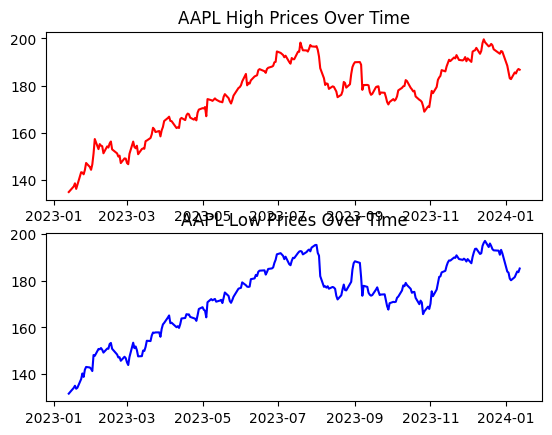

In [69]:
#Line Chart for AAPL and GOOGL Closing Prices Over Time:
fig, axs = plt.subplots(2)
axs[0].plot(df['Date'], df['AAPL_High'], color='red', label='High')
axs[0].set_title('AAPL High Prices Over Time')
axs[1].plot(df['Date'], df['AAPL_Low'], color='blue', label='Low')
axs[1].set_title('AAPL Low Prices Over Time')
plt.show()

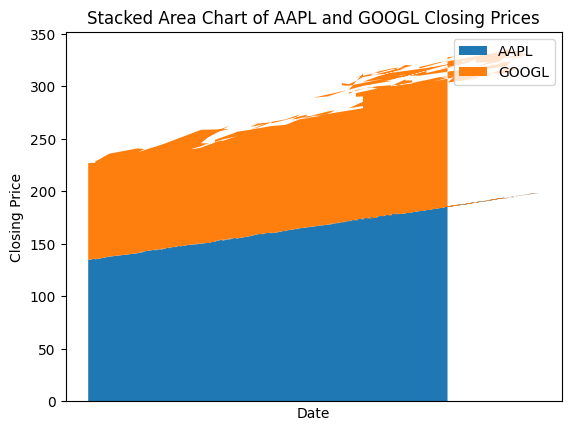

In [37]:
#Stacked Area Chart for AAPL and GOOGL Closing Prices:
plt.stackplot(df['Date'], df['AAPL_Close'], df['GOOGL_Close'], labels=['AAPL', 'GOOGL'])
plt.legend()
plt.title('Stacked Area Chart of AAPL and GOOGL Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

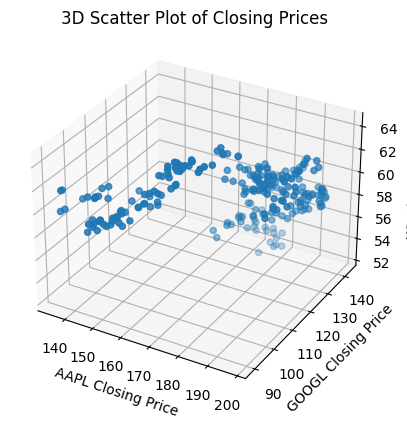

In [38]:
#3D Scatter Plot for AAPL, GOOGL, and KO Closing Prices:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['AAPL_Close'], df['GOOGL_Close'], df['KO_Close'])
ax.set_xlabel('AAPL Closing Price')
ax.set_ylabel('GOOGL Closing Price')
ax.set_zlabel('KO Closing Price')
plt.title('3D Scatter Plot of Closing Prices')
plt.show()

In [64]:
df=stock_data

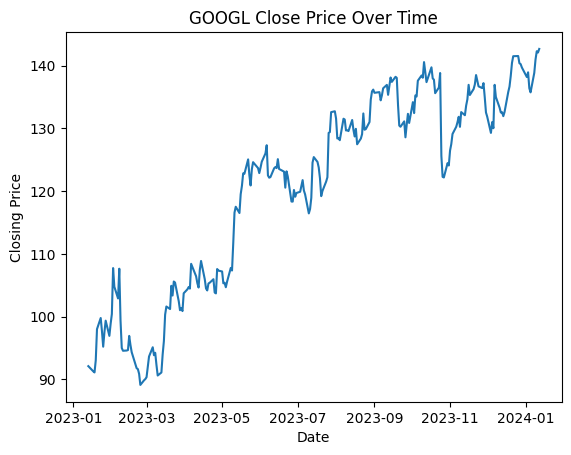

In [65]:
plt.plot(df['Date'], df['GOOGL_Close'])
plt.title('GOOGL Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

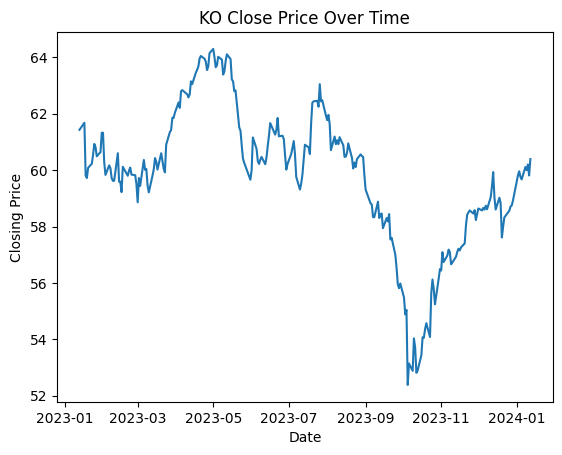

In [66]:
plt.plot(df['Date'], df['KO_Close'])
plt.title('KO Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

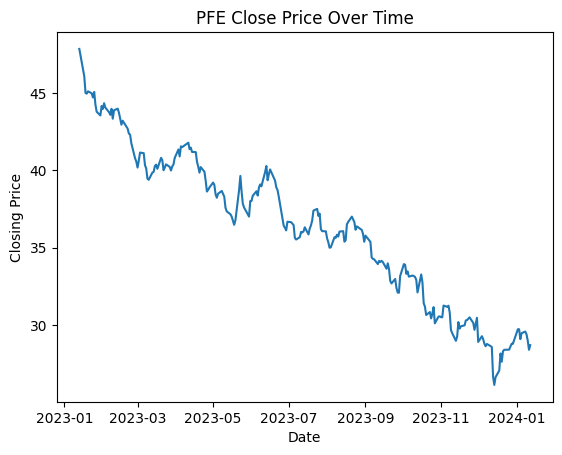

In [67]:
plt.plot(df['Date'], df['PFE_Close'])
plt.title('PFE Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()